In [85]:
# Q1-a
# Parse data files
amazon_data = open("amazon_cells_labelled.txt","r")
imdb_data = open("imdb_labelled.txt","r")
yelp_data = open("yelp_labelled.txt","r")

amazon_lines = [line.rstrip("\n") for line in amazon_data]
imdb_lines = [line.rstrip("\n") for line in imdb_data]
yelp_lines = [line.rstrip("\n") for line in yelp_data]

amazon_data = [i.split('\t')[0] for i in amazon_lines]
amazon_label = [i.split('\t')[1] for i in amazon_lines]
imdb_data = [i.split('\t', 1)[0] for i in imdb_lines]
imdb_label = [i.split('\t', 1)[1] for i in imdb_lines]
yelp_data = [i.split('\t', 1)[0] for i in yelp_lines]
yelp_label = [i.split('\t', 1)[1] for i in yelp_lines]

# Count label0 and 1 from Amazon, Imdb and Yelp
print("Amazon - Label0 count: "+str(amazon_label.count('0'))+", Label1 count: "+str(amazon_label.count('1')))
print("Imdb - Label0 count: "+str(imdb_label.count('0'))+", Label1 count: "+str(imdb_label.count('1')))
print("Yelp - Label0 count: "+str(yelp_label.count('0'))+", Label1 count: "+str(yelp_label.count('1')))

Amazon - Label0 count: 500, Label1 count: 500
Imdb - Label0 count: 500, Label1 count: 500
Yelp - Label0 count: 500, Label1 count: 500


In [86]:
# Q1-b: Remove noise and garbage of the data
# Lowercase all of the words
def lowercase(data):
    return [x.lower() for x in data]

amazon_data = lowercase(amazon_data)
imdb_data = lowercase(imdb_data)
yelp_data = lowercase(yelp_data)

In [87]:
# Q1-b: Remove noise and garbage of the data
# Strip punctuation
from string import punctuation

def strip_punctuation(data):
    for i in range(len(data)):
        data[i]=''.join([letter for letter in data[i] if letter not in punctuation])
    return data

amazon_data = strip_punctuation(amazon_data)
imdb_data = strip_punctuation(imdb_data)
yelp_data = strip_punctuation(yelp_data)

In [88]:
# Q1-b: Remove noise and garbage of the data
# Strip the stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
def strip_stop_words(data):
    for i in range(len(data)):
        word_tokens = word_tokenize(data[i])
        filtered_sentence = []
        for word in word_tokens:
            if word not in stop_words:
                filtered_sentence.append(word)
        data[i] = " ".join(filtered_sentence)
    return data

# print(strip_stop_words(['This is a sample sentence showing off the stop words filtration','test was good']))
amazon_data = strip_stop_words(amazon_data)
imdb_data = strip_stop_words(imdb_data)
yelp_data = strip_stop_words(yelp_data)

In [89]:
# Q1-b: Remove noise and garbage of the data
# Lemmatization of all the words, ex) running -> run, having -> have
from nltk.stem.snowball import SnowballStemmer

def stemmer(data):
    stemmer = SnowballStemmer("english")
    for i in range(len(data)):
        word_list = data[i].split(' ')
        temp = []
        for word in word_list:
            temp.append(stemmer.stem(word))
        data[i] = " ".join(temp)
    return data

# def stemmer(data):
#     stemmer = SnowballStemmer("english")
#     for i in range(len(data)):
#         data[i] = stemmer.stem(data[i])
#     return data

# amazon_data = stemmer(amazon_data)
# imdb_data = stemmer(imdb_data)
# yelp_data = stemmer(yelp_data)

In [90]:
# Q1-b: Remove noise and garbage of the data
# Lemmatization of all the words, ex) good, well, better, and best -> good
from nltk.stem import WordNetLemmatizer
def lemmatizer(data):
    lemmatizer = WordNetLemmatizer()
    for i in range(len(data)):
        word_list = data[i].split(' ')
        temp = []
        for word in word_list:
            temp.append(lemmatizer.lemmatize(word, 'v'))
        data[i] = " ".join(temp)
    return data

amazon_data = lemmatizer(amazon_data)
imdb_data =lemmatizer(imdb_data)
yelp_data = lemmatizer(yelp_data)

In [91]:
# Q1-c: Split training and testing set
data_training_set = amazon_data[:400] + amazon_data[500:900] + imdb_data[:400] + imdb_data[500:900] + yelp_data[:400] + yelp_data[500:900]
label_training_set = amazon_label[:400] + amazon_label[500:900] + imdb_label[:400] + imdb_label[500:900] + yelp_label[:400] + yelp_label[500:900]
data_testing_set = amazon_data[400:500] + amazon_data[900:1000] + imdb_data[400:500] + imdb_data[900:1000] + yelp_data[400:500] + yelp_data[900:1000]
label_testing_set = amazon_label[400:500] + amazon_label[900:1000] + imdb_label[400:500] + imdb_label[900:1000] + yelp_label[400:500] + yelp_label[900:1000]

In [92]:
# Q1-d: Bag of Words model
data_training_list = ' '.join(data_training_set).split(" ")
unique_words_dict = list(set(data_training_list))[1:] # remove duplicate values from a list

# print(stemmer(['games having running', 'well better best']))
# print(lemmatizer(['games having running', 'well better best']))
# print(unique_dict_words)

In [93]:
# Q1-d: Generate feature vector for training and testing set
def generate_feature_vector(data):
    feature_vectors = []
    for x in data:
        word_list = x.split(" ")
        count_list = []
        for word in unique_words_dict:
            count_list.append(word_list.count(word))
        feature_vectors.append(count_list)
    return feature_vectors

training_feature_vector = generate_feature_vector(data_training_set)
testing_feature_vector = generate_feature_vector(data_testing_set)

In [94]:
print(training_feature_vector[0])
print(training_feature_vector[1])

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [95]:
# Q1-e: Pick your postprocessing strategy
from sklearn import preprocessing
def l2_normalization(x):
    return preprocessing.normalize(x, norm="l1")
training_feature_vector = l2_normalization(training_feature_vector)
testing_feature_vector = l2_normalization(testing_feature_vector)

In [96]:
# Q1-f: Sentiment prediction using logistic regression and report the classification accuracy and confusion matrix.
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

logistic_reg = linear_model.LogisticRegression()
logistic_reg.fit(training_feature_vector, label_training_set)
classification_accuracy = logistic_reg.score(testing_feature_vector, label_testing_set)
print("Classification accuracy using a Logistic Regression:\n" + str(classification_accuracy) + '\n')

y_pred = logistic_reg.predict(testing_feature_vector)
matrix = confusion_matrix(label_testing_set, y_pred)
print("Confusion matrix using a Logistic Regression:\n" + str(matrix))

Classification accuracy using a Logistic Regression:
0.7833333333333333

Confusion matrix using a Logistic Regression:
[[288  47]
 [ 83 182]]


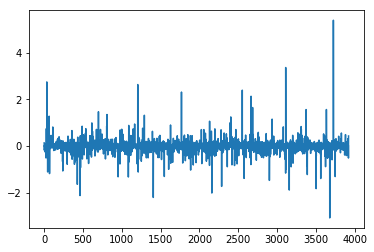

In [97]:
# Q1-f: Weight vector of the logistic regression
import matplotlib.pyplot as plt 
plt.plot(logistic_reg.coef_[0])

In [98]:
# Q1-f: Positive/Negative words that play the most important roles in deciding the sentiment of the reviews
positive_words = []
negative_words = []

for i in range(len(logistic_reg.coef_[0])):
    if logistic_reg.coef_[0][i] >= 2:
        positive_words.append(unique_words_dict[i])        
print('Positive words using a Logistic Regression:\n' + str(positive_words) + '\n')

for i in range(len(logistic_reg.coef_[0])):
    if logistic_reg.coef_[0][i] <= -2:
        negative_words.append(unique_words_dict[i])
print('Negative words using a Logistic Regression:\n' + str(negative_words))

Positive words using a Logistic Regression:
['good', 'excellent', 'best', 'nice', 'amaze', 'love', 'great']

Negative words using a Logistic Regression:
['terrible', 'worst', 'poor', 'bad']


In [99]:
# Q1-f: Repeat this with a Naive Bayes classifier and compare performance
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(training_feature_vector, label_training_set)
classification_accuracy = bnb.score(testing_feature_vector, label_testing_set)
print("Classification accuracy using a Naive Bayes:\n" + str(classification_accuracy) + '\n')

y_pred = bnb.predict(testing_feature_vector)

matrix = confusion_matrix(label_testing_set, y_pred)
print("Confusion matrix:\n" + str(matrix))

Classification accuracy using a Naive Bayes:
0.8

Confusion matrix:
[[281  54]
 [ 66 199]]


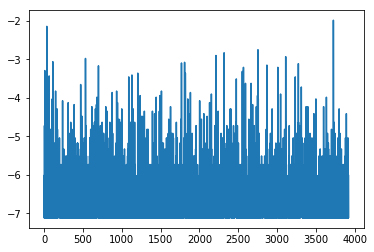

In [100]:
# Q1-f: Weight vector of a Naive Bayes classifier 
import matplotlib.pyplot as plt 
plt.plot(bnb.coef_[0])

In [101]:
# Q1-f: Words that play the most important roles in a Naive Bayes classifier 
words = []

for i in range(len(bnb.coef_[0])):
    if bnb.coef_[0][i] >= -3:
        words.append(unique_words_dict[i])        
print('Words using a Naive Bayes:\n' + str(words))

Words using a Naive Bayes:
['good', 'one', 'work', 'phone', 'film', 'love', 'great']


In [102]:
# Q1-g: N-gram Model (N=2)

def generate_unique_n_gram_dict(data):
    n_gram_dict = []

    for x in data:
        word_list = x.split(" ")
        for i in range(len(word_list)-1):
            if word_list[i+1] != None:
                n_gram_dict.append(word_list[i] + " " + word_list[i+1])
                
    return list(set(n_gram_dict))
    
# print(generate_unique_n_gram_dict(['Alice fell down rabbit hole','Hello world']))
unique_n_gram_dict = generate_unique_n_gram_dict(data_training_set)

In [103]:
# Q1-g: Generate feature vector for N-gram Model
def generate_n_gram_feature_vector(data):
    n_gram_feature_vector = []
    
    for x in data:
        word_list = x.split(" ")
        
        n_gram_word_list=[]        
        for i in range(len(word_list) - 1):
            if word_list[i+1] != None:
                n_gram_word_list.append(word_list[i] + " " + word_list[i+1])
        
        feature_vector=[]    
        for j in unique_n_gram_dict:
            feature_vector.append(n_gram_word_list.count(j))
            
        n_gram_feature_vector.append(feature_vector)
        
    return n_gram_feature_vector

training_n_gram_feature_vector = generate_n_gram_feature_vector(data_training_set)
testing_n_gram_feature_vector = generate_n_gram_feature_vector(data_testing_set)

In [104]:
# Q1-g: Pick your postprocessing strategy (normalization)
training_n_gram_feature_vector = l2_normalization(training_n_gram_feature_vector)
testing_n_gram_feature_vector = l2_normalization(testing_n_gram_feature_vector)

In [105]:
# Q1-g: Sentiment prediction using logistic regression and report the classification accuracy and confusion matrix.
n_gram_logistic_reg = linear_model.LogisticRegression()
n_gram_logistic_reg.fit(training_n_gram_feature_vector, label_training_set)
classification_accuracy = n_gram_logistic_reg.score(testing_n_gram_feature_vector, label_testing_set)
print("N-gram classification accuracy using a Logistic Regression:\n" + str(classification_accuracy) + '\n')

y_pred = n_gram_logistic_reg.predict(testing_n_gram_feature_vector)
n_gram_matrix = confusion_matrix(label_testing_set, y_pred)
print("N-gram confusion matrix:\n" + str(n_gram_matrix))

N-gram classification accuracy using a Logistic Regression:
0.56

N-gram confusion matrix:
[[ 95 240]
 [ 24 241]]


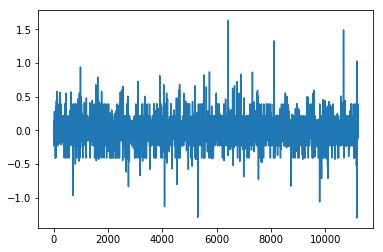

In [106]:
# Q1-g: Weight vector of the logistic regression
import matplotlib.pyplot as plt 
plt.plot(n_gram_logistic_reg.coef_[0])

In [107]:
# Q1-g: Positive/Negative words that play the most important roles in deciding the sentiment of the reviews
n_gram_positive_words = []
n_gram_negative_words = []

for i in range(len(n_gram_logistic_reg.coef_[0])):
    if n_gram_logistic_reg.coef_[0][i] >= 1:
        n_gram_positive_words.append(unique_n_gram_dict[i])        
print('Positive words using N-gram and Logistic Regression:\n' + str(n_gram_positive_words) + '\n')

for i in range(len(n_gram_logistic_reg.coef_[0])):
    if n_gram_logistic_reg.coef_[0][i] <= -1:
        n_gram_negative_words.append(unique_n_gram_dict[i])
print('Negative words using N-gram and Logistic Regression:\n' + str(n_gram_negative_words))

Positive words using N-gram and Logistic Regression:
['work great', 'highly recommend', 'great phone', 'great product']

Negative words using N-gram and Logistic Regression:
['dont buy', 'waste time', 'avoid cost', 'waste money']


In [108]:
# Q1-g: Repeat this with a Naive Bayes classifier and compare performance
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(training_n_gram_feature_vector, label_training_set)
classification_accuracy = bnb.score(testing_n_gram_feature_vector, label_testing_set)
print("N-gram classification accuracy using a Naive Bayes:\n" + str(classification_accuracy) + '\n')

y_pred = bnb.predict(testing_n_gram_feature_vector)
matrix = confusion_matrix(label_testing_set, y_pred)
print("N-gram Confusion matrix:\n" + str(matrix))

N-gram classification accuracy using a Naive Bayes:
0.56

N-gram Confusion matrix:
[[ 97 238]
 [ 26 239]]


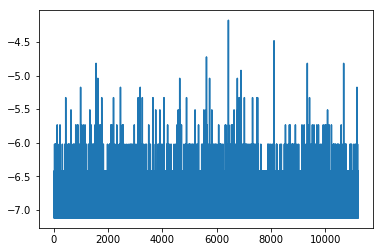

In [109]:
# Q1-g: Weight vector of a Naive Bayes classifier 
import matplotlib.pyplot as plt 
plt.plot(bnb.coef_[0])

In [110]:
# Q1-g: Words that play the most important roles in a Naive Bayes classifier 
words = []

for i in range(len(bnb.coef_[0])):
    if bnb.coef_[0][i] >= -5:
        words.append(unique_n_gram_dict[i])        
print('Words using N-gram and Naive Bayes:\n' + str(words))

Words using N-gram and Naive Bayes:
['work well', 'one best', 'work great', 'great food', 'highly recommend', 'sound quality', 'great phone']


In [111]:
# Q1-h: PCA for bag of words model
import numpy as np

def pca(feature_vector, dimension):
    mean = np.mean(feature_vector, axis=0)
    new_feature_vector = feature_vector - mean
    U, s, Vh = np.linalg.svd(new_feature_vector)
    eigen_value, eigen_vector = s, Vh
    new_eigen_vector = eigen_vector[:dimension]
    new_feature_vector = np.asmatrix(feature_vector).dot(new_eigen_vector.T)
    
    return new_feature_vector

def generate_pca_logreg_NB(training_feature_vector, testing_feature_vector, dimension):
    new_training_feature_vector = pca(training_feature_vector, dimension)
    new_testing_feature_vector = pca(testing_feature_vector, dimension)

    pca_logistic_reg = linear_model.LogisticRegression()
    pca_logistic_reg.fit(new_training_feature_vector, label_training_set)
    classification_accuracy = pca_logistic_reg.score(new_testing_feature_vector, label_testing_set)
    print("Classification accuracy using a Logistic Regression:\n" + str(classification_accuracy))

    y_pred = pca_logistic_reg.predict(new_testing_feature_vector)
    matrix = confusion_matrix(label_testing_set, y_pred)
    print("Confusion matrix using a Logistic Regression:\n" + str(matrix))

    bnb = BernoulliNB()
    bnb.fit(new_training_feature_vector, label_training_set)
    classification_accuracy = bnb.score(new_testing_feature_vector, label_testing_set)
    print("Classification accuracy using a Naive Bayes:\n" + str(classification_accuracy))

    y_pred = bnb.predict(new_testing_feature_vector)
    matrix = confusion_matrix(label_testing_set, y_pred)
    print("Confusion matrix using a Naive Bayes:\n" + str(matrix) + '\n')


In [112]:
print("[PCA for bag of words model, d=10]")
generate_pca_logreg_NB(training_feature_vector, testing_feature_vector, 10)
print("[PCA for bag of words model, d=50]")
generate_pca_logreg_NB(training_feature_vector, testing_feature_vector, 50)
print("[PCA for bag of words model, d=100]")
generate_pca_logreg_NB(training_feature_vector, testing_feature_vector, 100)

[PCA for bag of words model, d=10]
Classification accuracy using a Logistic Regression:
0.5266666666666666
Confusion matrix using a Logistic Regression:
[[264  71]
 [213  52]]
Classification accuracy using a Naive Bayes:
0.5466666666666666
Confusion matrix using a Naive Bayes:
[[252  83]
 [189  76]]

[PCA for bag of words model, d=50]
Classification accuracy using a Logistic Regression:
0.55
Confusion matrix using a Logistic Regression:
[[235 100]
 [170  95]]
Classification accuracy using a Naive Bayes:
0.4816666666666667
Confusion matrix using a Naive Bayes:
[[221 114]
 [197  68]]

[PCA for bag of words model, d=100]
Classification accuracy using a Logistic Regression:
0.5483333333333333
Confusion matrix using a Logistic Regression:
[[228 107]
 [164 101]]
Classification accuracy using a Naive Bayes:
0.5383333333333333
Confusion matrix using a Naive Bayes:
[[252  83]
 [194  71]]

